## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv("MovieReviews.csv")

In [3]:
df.head()

,label,review
0,positive,One of the other reviewers has mentioned that ...
1,positive,A wonderful little production. <br /><br />The...
2,positive,I thought this was a wonderful way to spend ti...
3,negative,Basically there's a family where a little boy ...
4,positive,"Petter Mattei's ""Love in the Time of Money"" is..."


In [4]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
len(df)

50000

In [6]:
print(df.shape)

(50000, 2)


In [7]:
df["label"].value_counts()

positive    25000
negative    25000
Name: label, dtype: int64

<font color=blue>This shows that the dataset is perfectly split between positive and negative reviews. </font>

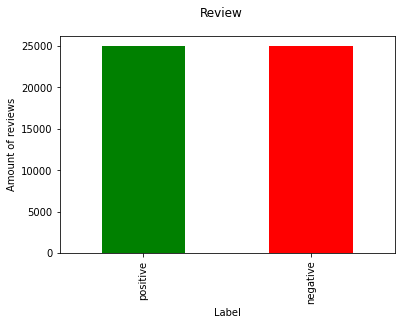

In [8]:
df["label"].value_counts().plot(kind = "bar", color = ["green", "red"])
plt.suptitle("Review")
plt.xlabel("Label")
plt.ylabel("Amount of reviews") 

plt.savefig("Dataset visualisation.png")

<font color=blue>A bar chart to visualise the dataset. </font>

## Detect & remove NaN values:

In [9]:
# Check for the existence of NaN values in a cell:
df.isnull().sum()

label     0
review    0
dtype: int64

<font color=blue>0 records show **NaN** (not a number = None). This can be easily removed using the .dropna() pandas function.</font>

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [12]:
len(df)

50000

<font color=blue>After removing NaN values, there are now **50,000** records remaining. **50,000** - **0** = **50,000**</font>

## Detect & remove empty strings

In [13]:
# test
myString = "Hello world"
emptyString = " "

In [14]:
myString.isspace()

False

In [15]:
emptyString.isspace()

True

In [16]:
blanks = []

# (index, label, review text)
for i, lb, rv in df.itertuples(): # iterate over the DataFrame
    if rv.isspace():              # test 'review' for whitespace
        blanks.append(i)          # add matching index numbers to the list

In [17]:
len(blanks)

0

<font color=blue>There are **0** whitespaces in the dataset.</font>

## Check the label column

In [18]:
df["label"].value_counts()

positive    25000
negative    25000
Name: label, dtype: int64

## Split the data into train & test sets:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df["label"].value_counts()

positive    25000
negative    25000
Name: label, dtype: int64

In [21]:
X = df["review"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Build pipelines to transform the data

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import time

In [27]:
# SVM:
text_clf_lsvc = Pipeline([("tfidf", TfidfVectorizer()),
                    ("clf", LinearSVC(loss = "hinge")),
                    ])

# fit_intercept = False, class_weight = "balanced", tol = 100 / 500

# Naïve Bayes:
text_clf_nb = Pipeline([("tfidf", TfidfVectorizer()),
                     ("clf", MultinomialNB()),
                       ])

# Logistic Regression:
text_clf_lr = Pipeline([("tfidf", TfidfVectorizer()),
                    ("clf", LogisticRegression()),
                    ])

### Pass the training data through the SVM pipeline (main)

In [30]:
start_time = time.time()
print(text_clf_lsvc.fit(X_train, y_train))
elapsed_time = time.time() - start_time
print("Time elapsed: ", elapsed_time)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC(loss='hinge'))])
Time elapsed:  6.555482387542725


### Run predictions and evaluate the SVM model (main)

In [31]:
predictions = text_clf_lsvc.predict(X_test)

In [32]:
# Printing the accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))

Accuracy:  0.9017333333333334


In [33]:
# Creating the classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.90      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [34]:
# print(metrics.confusion_matrix(y_test, predictions))

In [35]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,6628,783
Actual Positive,691,6898


<font color=blue>Total of **15,000** (test set = 30%).</font>

<font color=blue>**SVM** provided the best results at **90%** accuracy for classifying reviews as positive or negative.</font>

### Pass the training data through the Naïve Bayes pipeline (baseline)

In [36]:
start_time = time.time()
print(text_clf_nb.fit(X_train, y_train))
elapsed_time = time.time() - start_time
print("Time elapsed: ", elapsed_time)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
Time elapsed:  6.226386547088623


### Run predictions and evaluate the Naïve Bayes model (baseline)

In [37]:
predictions = text_clf_nb.predict(X_test)

In [38]:
# Printing the accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))

Accuracy:  0.8608666666666667


In [39]:
# Creating the classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      7411
    positive       0.89      0.83      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [40]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,6620,791
Actual Positive,1296,6293


<font color=blue>Total of **15,000** (test set = 30%).</font>

<font color=blue>**Naïve Bayes** provided very good results at **86%** accuracy for classifying reviews as positive or negative.</font>

### Pass the training data through the Logistic Regression pipeline (baseline)

In [41]:
start_time = time.time()
print(text_clf_lr.fit(X_train, y_train))
elapsed_time = time.time() - start_time
print("Time elapsed: ", elapsed_time)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])
Time elapsed:  8.67879605293274


### Run predictions and evaluate the Logistic Regression model (baseline)

In [42]:
predictions = text_clf_lr.predict(X_test)

In [43]:
# Printing the accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))

Accuracy:  0.8993333333333333


In [44]:
# Creating the classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [45]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,6585,826
Actual Positive,684,6905


<font color=blue>Total of **15,000** (test set = 30%).</font>

<font color=blue>**Logistic Regression** provided brilliant results at **89%** accuracy for classifying reviews as positive or negative.</font>

### Feed new data into trained models

In [46]:
myreview = ["I loved this moview", "I hated this moview", "I did not like this moview"]

In [50]:
print(text_clf_lsvc.predict([myreview[0]]))

['positive']


In [51]:
print(text_clf_nb.predict([myreview[1]]))

['negative']


In [52]:
print(text_clf_lr.predict([myreview[2]]))

['negative']
